In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('QueryResults.csv')

In [3]:
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [5]:
# provide these column names: ['DATE', 'TAG', 'POSTS']
df.rename(columns={'m':'DATE','TagName':'TAG','Unnamed: 2':'POSTS'},inplace=True)

In [ ]:
# another way to change columns name
# df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

In [7]:
# Look at the first and last 5 rows of the DataFrame.
print('First Five data: ')
df.head()

First Five data: 


,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [8]:
print('Last five data: ')
df.tail()

Last five data: 


,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [9]:
# How many rows and how many columns does it have?
print("(rows,columns)")
df.shape

(rows,columns)


(1991, 3)

In [11]:
# Count the number of entries in each column.
print("Number of columns in each ")
df.count()

Number of columns in each 


DATE     1991
TAG      1991
POSTS    1991
dtype: int64

In [22]:
# how to count the number of posts per language?
df.groupby('TAG').sum()

,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


In [23]:
# how many months of entries exist per programming language. 
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [24]:
# Which programming language had the most number of posts since the creation of Stack Overflow?
df.groupby('TAG').sum().max()

POSTS    2056510
dtype: int64

In [28]:
df.groupby('TAG').sum().idxmax()

POSTS    javascript
dtype: object

# Data Cleaning: Working with Time Stamps

In [32]:
# to get a row
df['DATE'][1]

'2008-08-01 00:00:00'

In [33]:
# 2nd method to get
df.DATE[1]

'2008-08-01 00:00:00'

In [34]:
# data type of Date column
type(df['DATE'][1])

str

In [35]:
#  convert str to date format get rid of unneccessary 00:00:00 data
df.DATE=pd.to_datetime(df.DATE)

In [36]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


# Data Manipulation: Pivoting DataFrames

In [37]:
# changing row to column and column to row
reshaped_df=df.pivot(index='DATE',columns='TAG',values='POSTS')

In [40]:
# Examine the dimensions of the reshaped DataFrame. How many rows does it have? How many columns?
print('rows,columns')
reshaped_df.shape

rows,columns


(145, 14)

In [41]:
# Examine the head and the tail of the DataFrame. What does it look like?
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [42]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0


In [45]:
# Print out the column names.
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

# Dealing with NaN Values

In [46]:
# check for NaN
reshaped_df.isna()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,True,True,False,True,True,True,True,True,True,True,True,True,True,True
2008-08-01,False,False,False,False,False,True,False,False,False,False,False,True,False,True
2008-09-01,False,False,False,False,False,True,False,False,False,False,False,False,False,True
2008-10-01,False,False,False,False,False,True,False,False,False,False,False,True,False,True
2008-11-01,False,False,False,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2020-04-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2020-05-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [47]:
# check NaN is present or not in whole data
reshaped_df.isna().values.any()

True

In [50]:
reshaped_df.fillna(0,inplace=True)

In [52]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [53]:
reshaped_df.isna().values.any()

False

# Data Visualisation with Matplotlib

In [54]:
import matplotlib.pyplot as plt

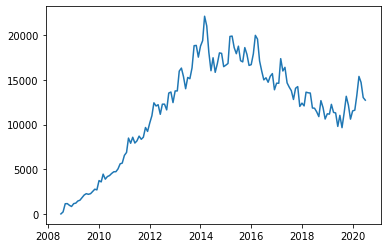

In [55]:
plt.plot(reshaped_df.index,reshaped_df.java)

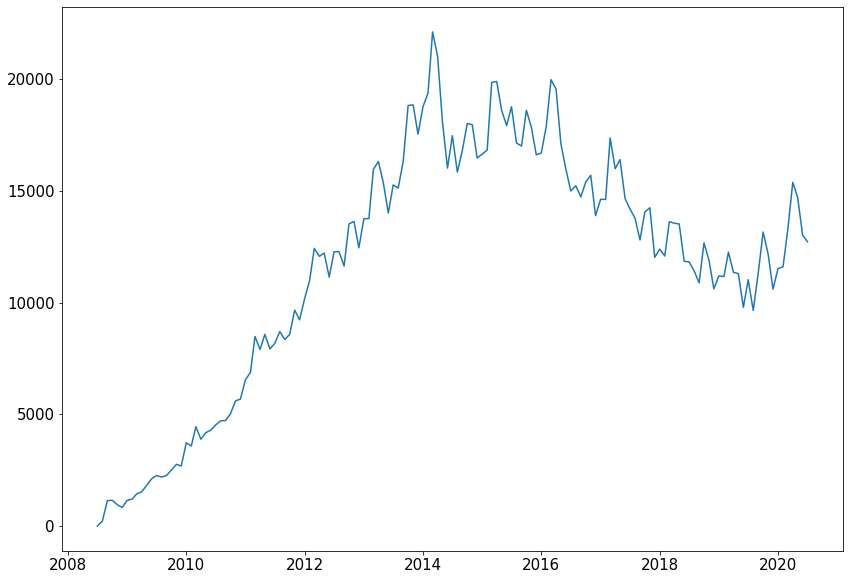

In [60]:
plt.figure(figsize=(14,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(reshaped_df.index,reshaped_df['java'])

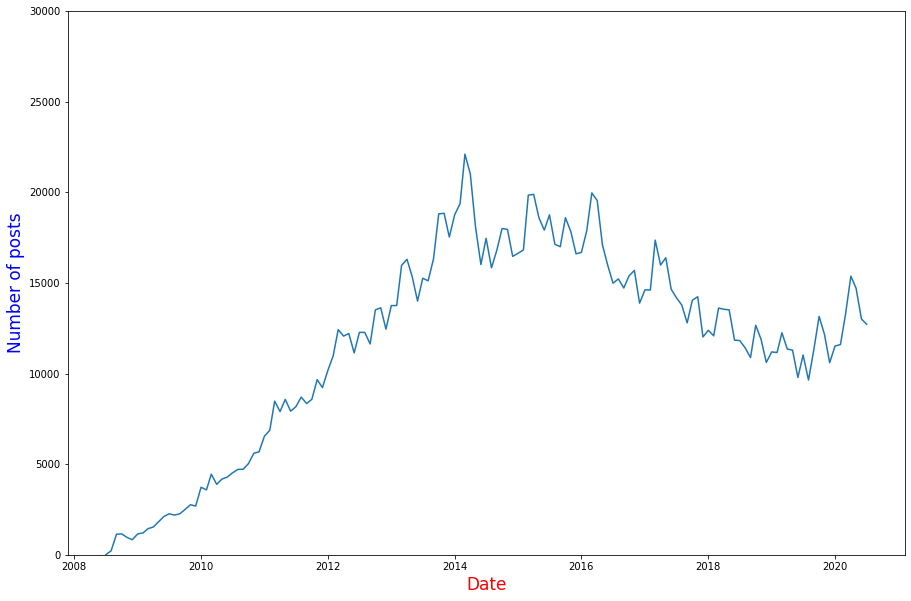

In [64]:
plt.figure(figsize=(15,10))
plt.xlabel('Date',fontsize=17,color='red')
plt.ylabel('Number of posts',fontsize=17,color='blue')
plt.ylim(0,30000)
plt.plot(reshaped_df.index,reshaped_df['java'])

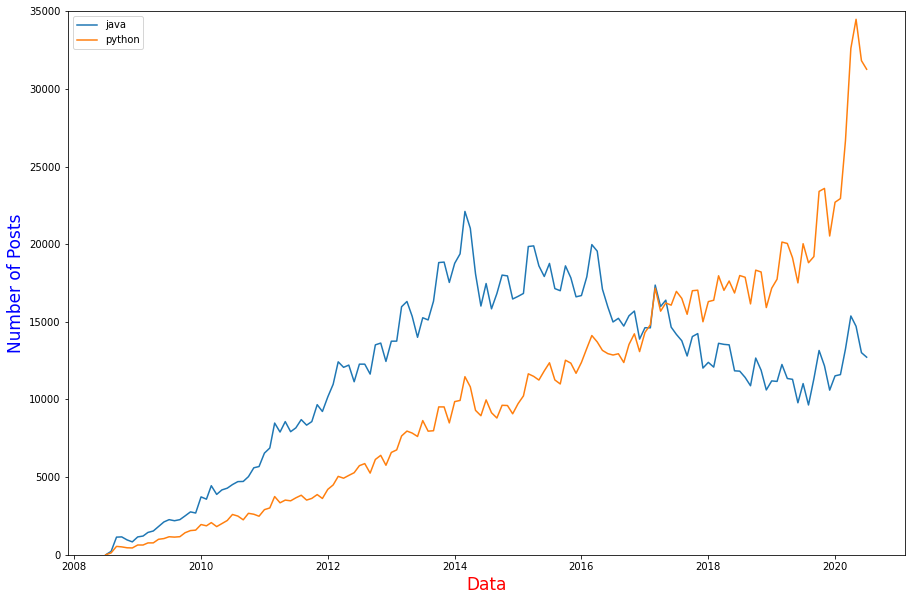

In [74]:
plt.figure(figsize=(15,10))
plt.xlabel('Data',fontsize=17,color='red')
plt.ylabel('Number of Posts',fontsize=17,color='blue')
plt.ylim(0,35000)
plt.plot(reshaped_df.index,reshaped_df['java'])
plt.plot(reshaped_df.index,reshaped_df['python'])
plt.legend(['java','python'])

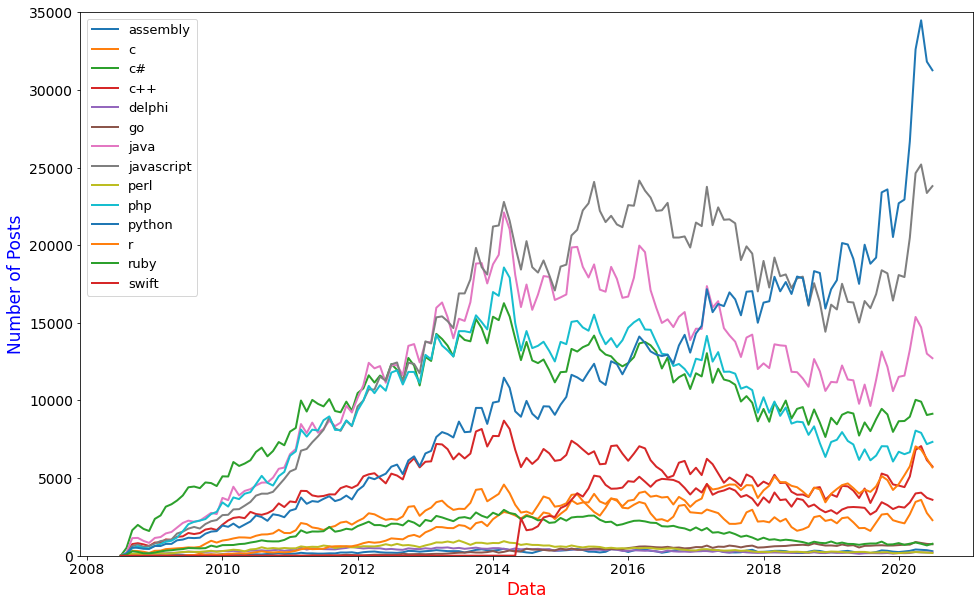

In [82]:
# show all programming graph at once
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Data',fontsize=17,color='red')
plt.ylabel('Number of Posts',fontsize=17,color='blue')
plt.ylim(0,35000)

# plot all language using loop
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index,reshaped_df[column],linewidth=2,label=reshaped_df[column].name)
    
plt.legend(fontsize=13)

# Smoothing out Time-Series Data

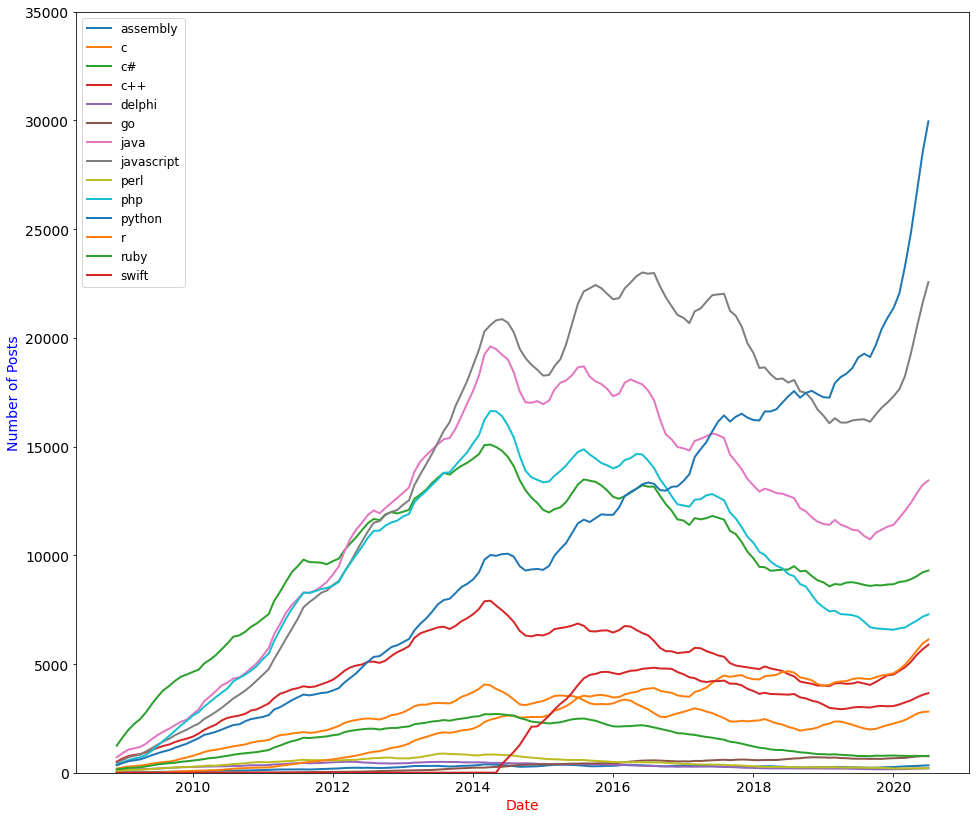

In [89]:
roll_df=reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,14))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14,color='red')
plt.ylabel('Number of Posts',fontsize=14,color='blue')
plt.ylim(0,35000)

# plot the roll_df
for column in roll_df.columns:
    plt.plot(roll_df.index,roll_df[column],linewidth=2,label=roll_df[column].name)
    
plt.legend(fontsize=12)    